# FEATURE ENGINEERING
Feature Engineerig is the process of using domain knowledge to extract features from raw data. These functions can be used to improve the performance of machine learning algorithms

# FEATURE SCALING
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

# Types of Feature Scaling
1) Standardization / Z Score Normalization :- Standard Scaler
2) Normalization :- Min-Max Scaler | Robust Scaler | Max Abs Scaling
* When you have more outliers in your data you have to perform Robust scaling

# Standardization Vs Normalization

1) First you have to understand what kind of data are you working on .
2) Then understand whether the the scaling is required or not. Some machine learning models not required scaling like Decision Trees.
3) If scaling is required then understand which Scaler is required. Usually most of the work done by Standard Scaler.
4) Use of Min-Max Scale :- When you know the min and max value of data and the range is not versatile. Image Processing in CNN, because it's range is fixed (0-255) OR When you have Frequency in your variable like weight in kgs or height in cms. 
5) Use of Robust Scale :- When you have more outliers in your data it is recommended to use Robust Scaler.
6) Use of Max Abs Scale :- Used when know data consists spare metrix use Max Abs Scaler.


# When to use standardization? 

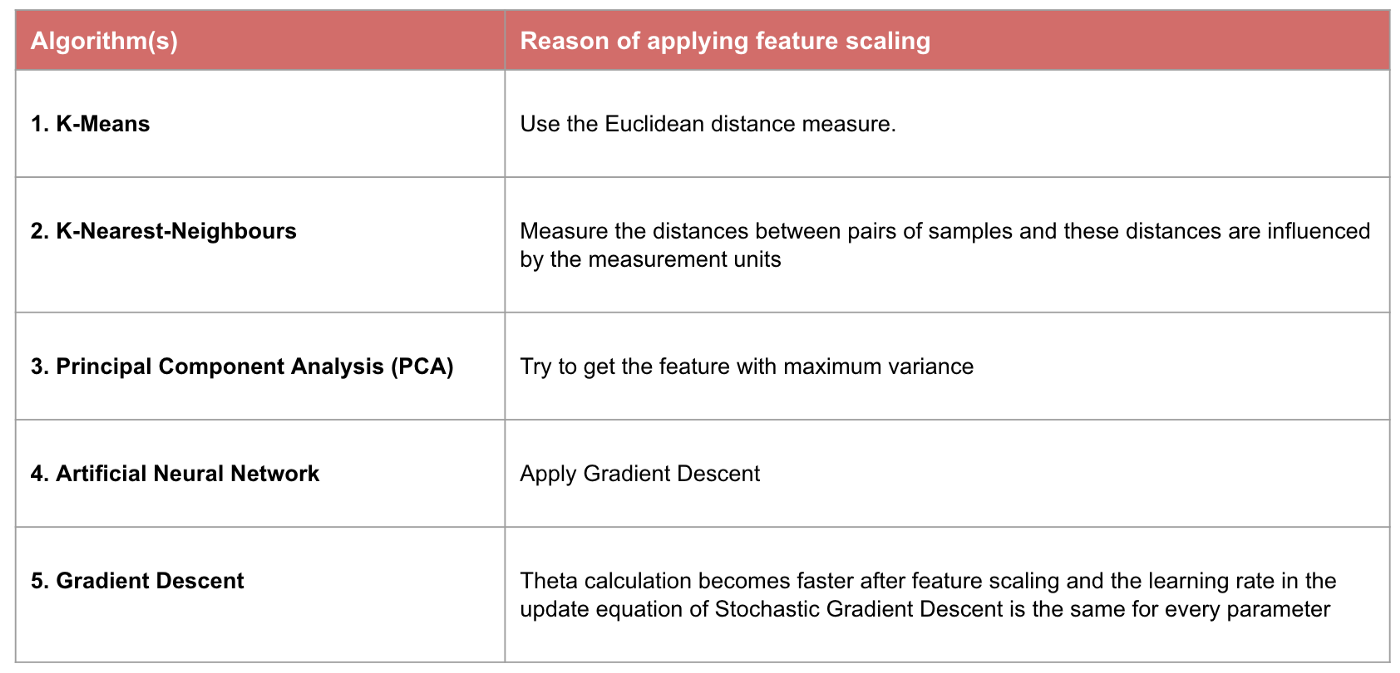

# 1) Standardization / Z Score Normalization :- Standard Scaler

In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
#df.head()

## Question :- By working on data set you have to create machine learning model which predicts that the person purchase or not.

In [3]:
# df.iloc[rows,columns] use to get particular rows and columns from data set

df = df.iloc[:,2:]

Standard Scaler is not work with categorical variables so, we drop categorical columns to understand the standard scaler better.

In [4]:
# df.sample() use to see the random data 

df.sample(5)

,Age,EstimatedSalary,Purchased
230,35,147000,1
163,35,38000,0
378,41,87000,1
113,37,55000,0
38,26,72000,0


# Train Test Split 

Train Test Split is use to split data between Training and Testing. Usually 70% of data use for Training and 30% of data is use for Testing

While doing feature scaling in standardization or normalization it is recommended to do train test split 

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

X_test.shape,X_train.shape

((120, 2), (280, 2))

# Standard Scaler
Standard Scaler is use for standardize data of particular variables before putting it into ML Algorithm.

Formula of Standard Scaler
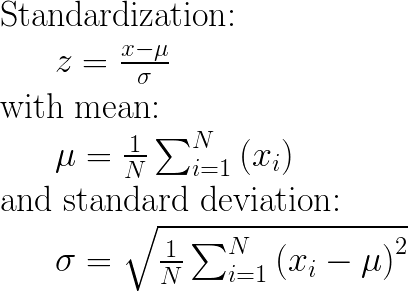

## Why to standardize before fitting a ML model?
Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

First Step:-

1. Fit standard scaler into X_train which store mean and standard deviation of particular variables. 
2. Fit the scaler to the train set, it will learn the parameter
3. We find mean and standard deviation of variables because it is neccessary before applying standard scaler on variables
4. Standard Scaler use the mean and standard deviation of particular variables then apply formula of standard scaler on whole 

6. We only fit the scaler in X_train because it learns from it and applying/transform on both X_train, X_test because the mean and standard deviation of X_train is same for both 



In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
# Mean of all variables/columns present in X_train

scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

Second Step:- 

1. We transform/apply the standard scaler on all variables of X_train and X_test
2. We store the new values of both X_train and X_test in a new variables
3. The formula is apply on every single data point present in variables




In [10]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

1) The new values are in the form of numpy arrays as you see
2) We put this new values of variables accordingly into new Data Frame


In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


You see the difference of before and after Scaling

In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [16]:
np.round(X_test_scaled.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,-0.1,-0.0
std,1.1,1.0
min,-1.9,-1.6
25%,-1.0,-0.7
50%,-0.2,-0.2
75%,0.7,0.5
max,2.2,2.3


# Effects of Scaling

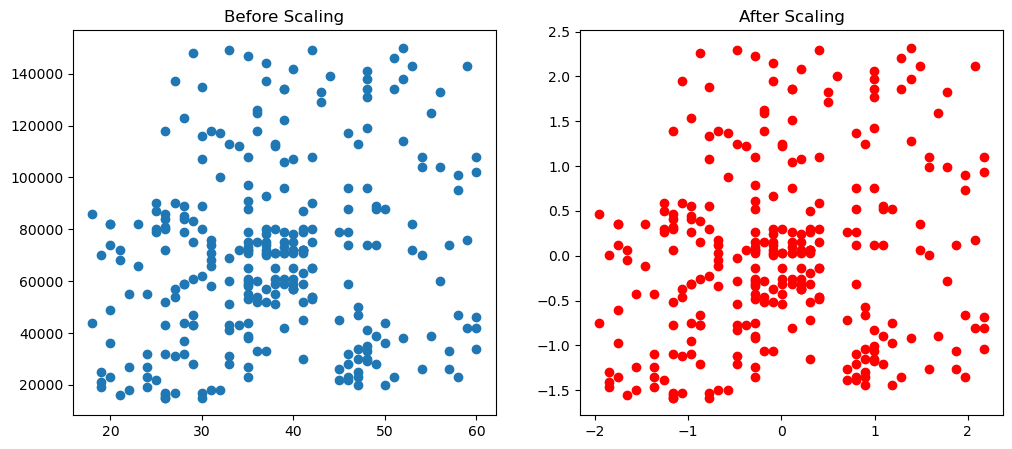

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

As you see the shape of Data is not change only the scale is changed.

# Comparison of Distributions

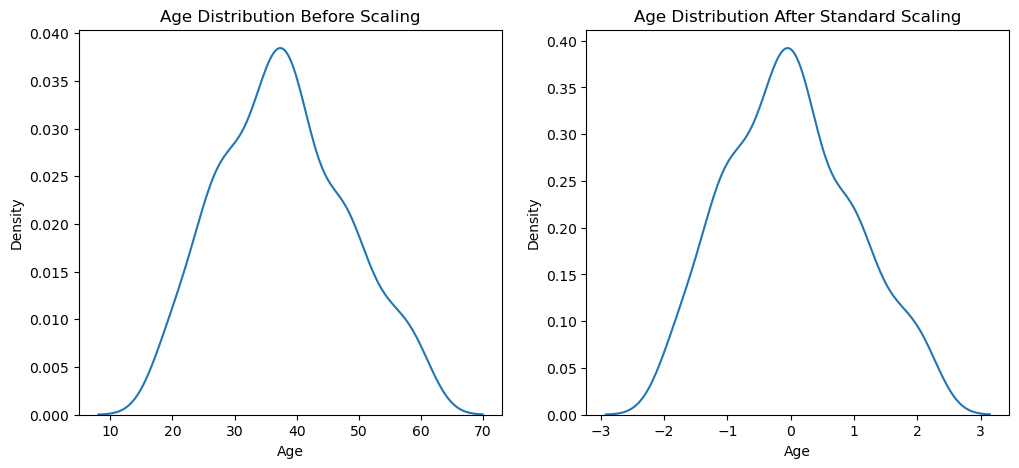

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

As you see their is no change in distribution only scale is changed

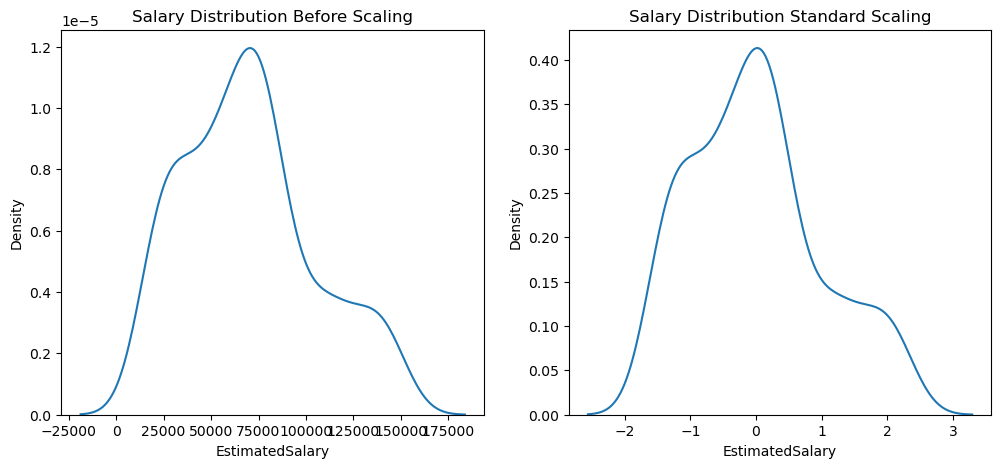

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Another method of doing the same work in optimized manner

In summary, fit performs the training, transform changes the data in the pipeline in order to pass it on to the next stage in the pipeline, and fit_transform does both the fitting and the transforming in one possibly optimized step.



# Train Test Split

In [20]:
# We drop the column which we want to predict
# We also drop columns which are not needed like customerId,Index etc.

X = df.drop(['Purchased'],axis=1)
X.head(2)

,Age,EstimatedSalary
0,19,19000
1,35,20000


In [21]:
#In y variable we only put that column which we want to predict

y=df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### Data Preparation for model building


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=0)

In [24]:
# We see here that our data is divided into 70:30 ratio

X_train.shape, X_test.shape

((280, 2), (120, 2))

## Use of Standard Scaler

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['Age','EstimatedSalary']] = scaler.fit_transform(X_train[['Age','EstimatedSalary']])

X_train.head()

,Age,EstimatedSalary
92,-1.163172,-1.584970
223,2.170181,0.930987
234,0.013305,1.220177
232,0.209385,1.075582
377,0.405465,-0.486047


In [26]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [27]:
np.round(X_test.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


In [28]:
X_test[['Age','EstimatedSalary']] = scaler.fit_transform(X_test[['Age','EstimatedSalary']])

In [29]:
np.round(X_test.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.7,-1.7
25%,-0.8,-0.7
50%,-0.1,-0.2
75%,0.7,0.5
max,2.1,2.5


# 2) Normalization :- 
* Use to remove outliers and if the features in data set are like weight, height which represents kilogram or feet/inches etc. It is recommended to use normalization.

* Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. 

# a. Min Max Scaling 
* It is the most useful scaler in normalization. Usually we use it 90% of time 
* It convert the data into range (0-1)

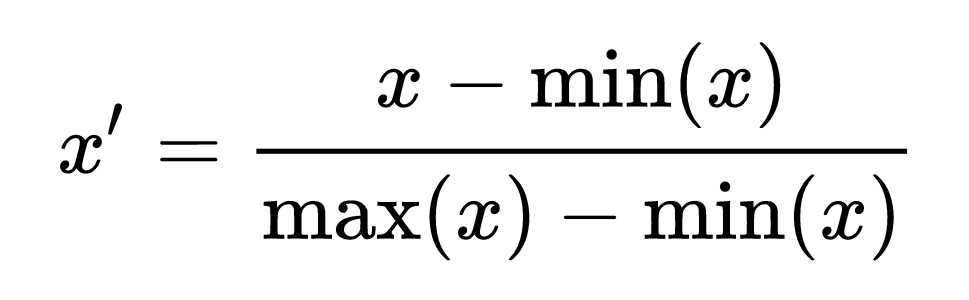

In [124]:
df = pd.read_csv("winequalityN.csv",usecols=[6,11,12])
df.head(3)

,free sulfur dioxide,alcohol,quality
0,45.0,8.8,6
1,14.0,9.5,6
2,30.0,10.1,6


## See the distribution of data before scaling

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

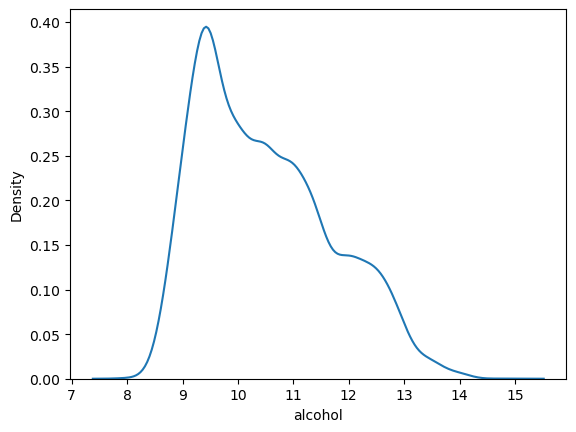

In [120]:
sns.kdeplot(df['alcohol'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

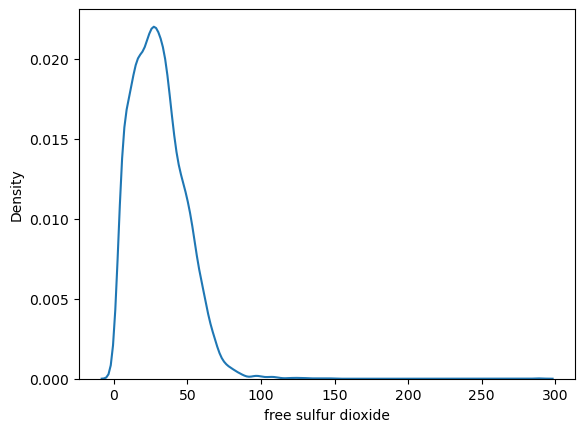

In [125]:
sns.kdeplot(df['free sulfur dioxide'])

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='free sulfur dioxide'>

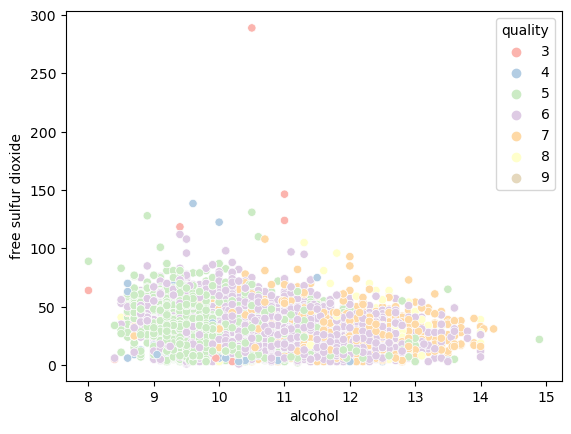

In [151]:
sns.scatterplot(df['alcohol'],df['free sulfur dioxide'],hue=df['quality'],palette='Pastel1')

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1),
                                                    df['quality'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((4547, 2), (1950, 2))

In [135]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Before Scaling

In [137]:
np.round(X_train.describe(), 1)

,free sulfur dioxide,alcohol
count,4547.0,4547.0
mean,30.4,10.5
std,17.9,1.2
min,1.0,8.0
25%,17.0,9.5
50%,29.0,10.3
75%,41.0,11.3
max,289.0,14.2


## After Scaling

In [138]:
np.round(X_train_scaled.describe(), 1)

,free sulfur dioxide,alcohol
count,4547.0,4547.0
mean,0.1,0.4
std,0.1,0.2
min,0.0,0.0
25%,0.1,0.2
50%,0.1,0.4
75%,0.1,0.5
max,1.0,1.0


## See the distribution and scale of data before and after using Min-Max Scaler

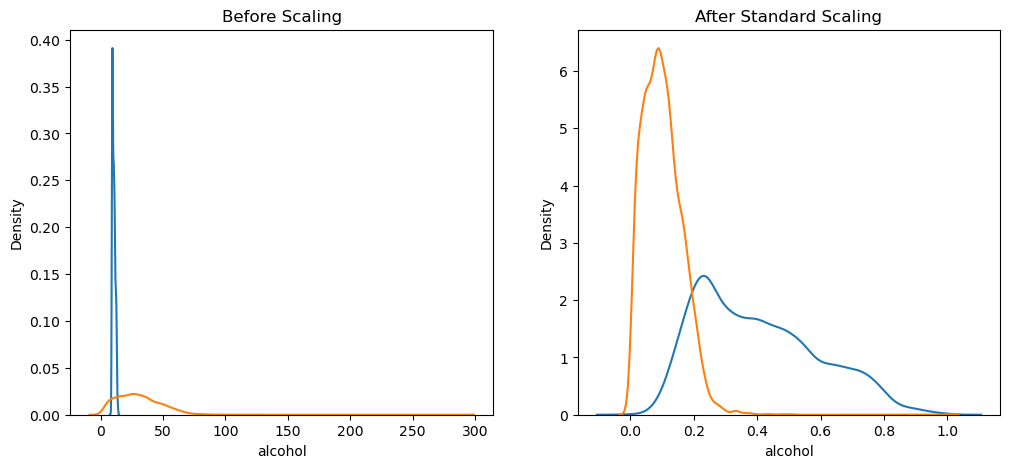

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)
sns.kdeplot(X_train['free sulfur dioxide'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['free sulfur dioxide'], ax=ax2)
plt.show()

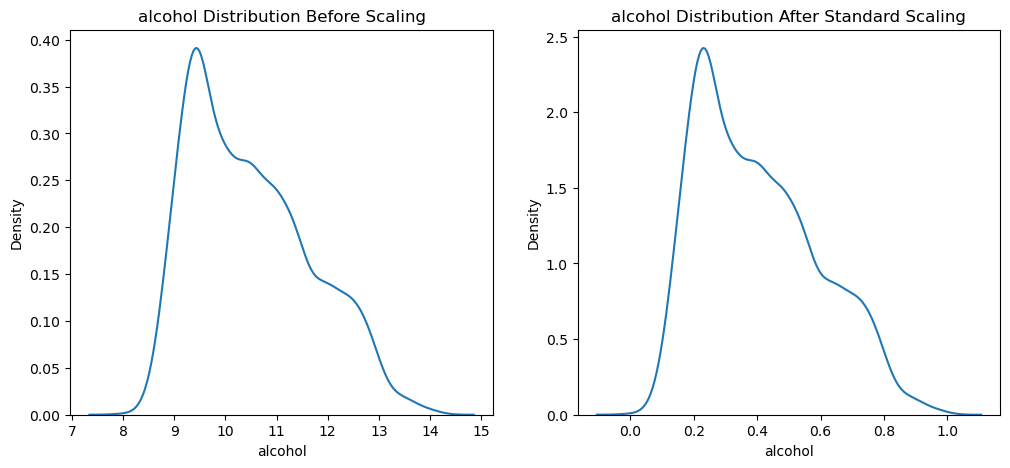

In [140]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('alcohol Distribution Before Scaling')
sns.kdeplot(X_train['alcohol'], ax=ax1)

# after scaling
ax2.set_title('alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['alcohol'], ax=ax2)
plt.show()

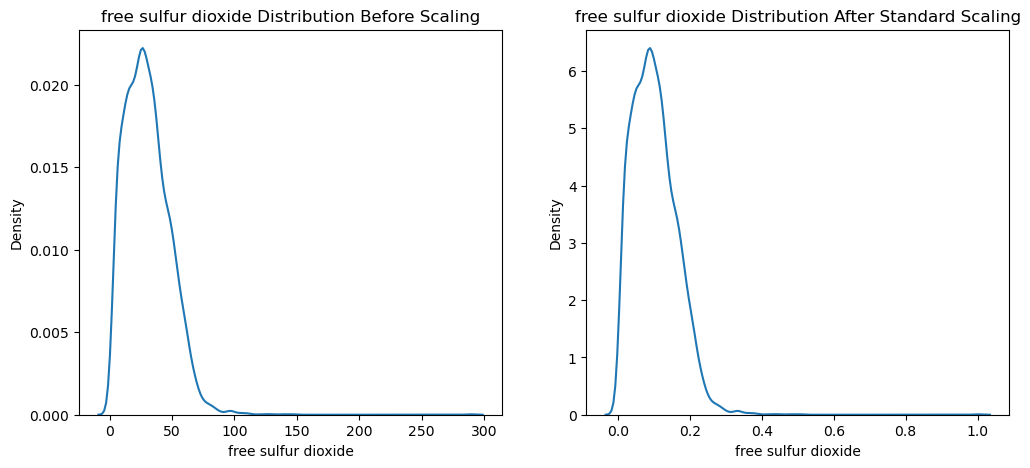

In [141]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('free sulfur dioxide Distribution Before Scaling')
sns.kdeplot(X_train['free sulfur dioxide'], ax=ax1)

# after scaling
ax2.set_title('free sulfur dioxide Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['free sulfur dioxide'], ax=ax2)
plt.show()

# Encoding Categorical Variables 

There are two types of categorical variables :-

1) Nominal Data :- Nominal data is labelled into mutually exclusive categories within a variable. These categories cannot be ordered in a meaningful way. For example, preferred mode of transportation is a nominal variable, because the data is sorted into categories: car, bus, train, tram, bicycle, etc.



2) Ordinal data:- Ordinal data is a kind of qualitative data that groups variables into ordered categories. The categories have a natural order or rank based on some hierarchal scale, like from high to low. But there is no clearly defined interval between the categories.

# Ordinal Encoding / Label Encoding

Ordinal Encoder :- We use Ordinal Encoder only with X_train,X_test variables not with our prediction variable.

Label Encoder :- We use label encoder with our prediction variable or y variable. 

# Ordinal Encoder
Encode categorical features as an integer array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken on by categorical (discrete) features. The features are converted to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

In [30]:
df = pd.read_csv("customer.csv")
df.sample(5)

,age,gender,review,education,purchased
32,92,Male,Average,UG,Yes
49,25,Female,Good,UG,No
13,57,Female,Average,School,No
46,64,Female,Poor,PG,No
48,39,Female,Good,UG,Yes


In [31]:
df = df.iloc[:,2:]
df.sample(5)

,review,education,purchased
25,Good,School,No
13,Average,School,No
24,Average,PG,Yes
32,Average,UG,Yes
30,Average,UG,No


In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:2],df.iloc[:,-1],test_size=0.2)

In [33]:
X_train.shape,X_test.shape

((40, 2), (10, 2))

In [34]:
X_train.sample(3)

,review,education
9,Good,UG
8,Average,UG
24,Average,PG


In [35]:
from sklearn.preprocessing import OrdinalEncoder

In [36]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

We define categories column wise because we want that assign the number according their value or weightage.(Poor<Average<Good). Ordinal Encoder assign 'poor'= 0, 'Average' = 1, 'Good'=2 

If we do not assign the variables in Ordinal Encoder it assigns random numbers to categories.

In [37]:
# We can use .transform with both X_train and X_test or y_train and y_test

X_train = oe.fit_transform(X_train)
X_test = oe.transform(X_test)

In [38]:
# It is necessary to use .tranform() after using .fit()
# When we use .transform() it convert the data into array

X_train,X_test

(array([[1., 2.],
        [2., 1.],
        [2., 0.],
        [0., 2.],
        [0., 2.],
        [2., 2.],
        [1., 1.],
        [2., 2.],
        [2., 0.],
        [0., 1.],
        [0., 2.],
        [0., 1.],
        [0., 0.],
        [0., 0.],
        [0., 2.],
        [0., 2.],
        [2., 0.],
        [0., 0.],
        [2., 2.],
        [1., 1.],
        [2., 1.],
        [1., 2.],
        [0., 2.],
        [0., 1.],
        [0., 1.],
        [2., 1.],
        [1., 2.],
        [1., 0.],
        [1., 1.],
        [1., 0.],
        [0., 2.],
        [2., 0.],
        [2., 1.],
        [0., 0.],
        [1., 1.],
        [2., 0.],
        [0., 2.],
        [1., 0.],
        [1., 0.],
        [2., 2.]]),
 array([[1., 0.],
        [0., 2.],
        [2., 2.],
        [2., 2.],
        [1., 1.],
        [0., 0.],
        [2., 1.],
        [1., 1.],
        [2., 0.],
        [2., 1.]]))

In [39]:
df = pd.DataFrame(X_train)
df1 = pd.DataFrame(X_test)

df.sample(5)

,0,1
32,2.0,1.0
3,0.0,2.0
27,1.0,0.0
39,2.0,2.0
24,0.0,1.0


In [40]:
df1.sample(5)

,0,1
7,1.0,1.0
2,2.0,2.0
0,1.0,0.0
8,2.0,0.0
3,2.0,2.0


As you see all the Categories of variables changed into numbers of X_train and X_test

# Label Encoder
Encode target labels with value between 0 and n_classes-1.

This transformer should be used to encode target values, i.e. y, and not the input X.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

* We will not decide the values of categories like Ordinal Encoder
* It assign values of categories by itself

In [43]:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [44]:
le.classes_

array(['No', 'Yes'], dtype=object)

* It shows that No=0, Yes=1 

In [45]:
y_train,y_test

(array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1]))

As you see by using .transform() all the data converts into array


In [46]:
df = pd.DataFrame(y_train)
df1 = pd.DataFrame(y_test)

df.head()

,0
0,1
1,0
2,0
3,1
4,1


In [47]:
df1.head()

,0
0,1
1,1
2,1
3,1
4,0


As you see both y_train and y_test convert into numerical variable by using Label Encoder


# One Hot Encoding

In [48]:
df = pd.read_csv("cars.csv") 
df.sample(5)

,brand,km_driven,fuel,owner,selling_price
7934,Mahindra,80000,Diesel,First Owner,600000
1109,Hyundai,56290,Diesel,First Owner,450000
5826,Hyundai,100000,Diesel,Second Owner,420000
4083,BMW,56000,Diesel,First Owner,3750000
3438,Honda,35000,Petrol,First Owner,580000


In [49]:
df.brand.value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [50]:
df['brand'].nunique()

32

In [51]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [52]:
df['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

# One Hot Encoding Using Pandas

* In Pandas their is a function called pd.get_dummies(df,columns=[' ',' '].
* It creates dummie variables of given columns

In [53]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


* It automatically drops the given column and creates new dummy columns of all categories 
* We use drop_first=True to drop first category column of given columns
* If we cann't do that it will create multi-collinearilty between them which makes a problem in model building

# One Hot Encoding Using Sklearn

We use One Hot Encoding at the place of dummy variables because:-
* It will not create new dummy variable sequence wise and every time the sequence of creating dummies is random
* But by using One Hot Encoder the position of all new created column will same every time
* That's why it is recommended to do One Hot Encoding

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [55]:
df = pd.read_csv("cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [56]:
df.shape

(8128, 5)

In [57]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

brand : 32 labels
km_driven : 921 labels
fuel : 4 labels
owner : 5 labels
selling_price : 677 labels


In [58]:
x = df.drop(['selling_price'],axis=1)

In [59]:
y = df['selling_price']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
X_train.head()

,brand,km_driven,fuel,owner
3042,Hyundai,60000,LPG,First Owner
1520,Tata,150000,Diesel,Third Owner
2611,Hyundai,110000,Diesel,Second Owner
3544,Mahindra,28000,Diesel,Second Owner
4138,Maruti,15000,Petrol,First Owner


As you see there is no differnce in Data Set now, train_test_split only divide the data into training and testing

In [62]:
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

* We use drop='first'to drop the first column
* We use sparse=False because by doing this new variables are created into numpy array other wise it will create new columns in sparse matrix then we convert into numpy array then we convert into Data Frame. By doing this we skip one step.
* We use dtype=int32 to convert float values into integers

In [63]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [64]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [65]:
X_train_new.shape,X_test_new.shape

((6502, 7), (1626, 7))

In [66]:
a = pd.DataFrame(X_train_new)
b = pd.DataFrame(X_test_new)

a.head(3)

,0,1,2,3,4,5,6
0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0


In [67]:
b.head(3)

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0


* It creates the new colums in seprate Data Frame as you see
* We have to combine old and new Data Frame

In [68]:
X_train_new = np.hstack((X_train[['brand','km_driven']].values,X_train_new))
X_train_new

array([['Hyundai', 60000, 0, ..., 0, 0, 0],
       ['Tata', 150000, 1, ..., 0, 0, 1],
       ['Hyundai', 110000, 1, ..., 1, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]], dtype=object)

In [69]:
a1 = pd.DataFrame(X_train_new)
a1.head(3)

,0,1,2,3,4,5,6,7,8
0,Hyundai,60000,0,1,0,0,0,0,0
1,Tata,150000,1,0,0,0,0,0,1
2,Hyundai,110000,1,0,0,0,1,0,0


# One Hot Encoding with Multiple Categories

In [70]:
df = pd.read_csv("cars.csv")
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [71]:
df.shape

(8128, 5)

In [72]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

brand : 32 labels
km_driven : 921 labels
fuel : 4 labels
owner : 5 labels
selling_price : 677 labels


In [73]:
df['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [74]:
counts = df['brand'].value_counts()

In [75]:
df['brand'].nunique()
threshold = 100

In [76]:
repl = counts[counts <= threshold].index

In [77]:
df1 = pd.get_dummies(df['brand'].replace(repl, 'uncommon'),drop_first=True)
df1.sample(10)

,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
9,0,1,0,0,0,0,0,0,0,0,0,0
7520,0,1,0,0,0,0,0,0,0,0,0,0
2892,0,0,0,0,0,0,0,0,0,0,0,1
2353,0,0,0,0,0,1,0,0,0,0,0,0
5211,0,0,0,0,1,0,0,0,0,0,0,0
183,0,0,0,1,0,0,0,0,0,0,0,0
4152,0,0,0,1,0,0,0,0,0,0,0,0
1742,0,0,0,0,0,1,0,0,0,0,0,0
3477,0,1,0,0,0,0,0,0,0,0,0,0
1441,0,0,0,0,0,1,0,0,0,0,0,0


In [78]:
df1.shape

(8128, 12)

In [79]:
df = pd.concat([df,df1], axis=1)
df.sample(3)

,brand,km_driven,fuel,owner,selling_price,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
1914,Mahindra,110000,Diesel,First Owner,400000,0,0,0,0,1,0,0,0,0,0,0,0
5614,Jaguar,9000,Diesel,First Owner,2711000,0,0,0,0,0,0,0,0,0,0,0,1
6042,Toyota,70000,Diesel,First Owner,3100000,0,0,0,0,0,0,0,0,0,1,0,0


In [80]:
df.shape

(8128, 17)

# Simple Imputer :- Use to fill missing values in data set. In numeric column by default it fill values by mean but you can change it by median and in categorical column it fill values by most frequent value(mode).

In [152]:
from sklearn.impute import SimpleImputer

In [154]:
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [155]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [156]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [157]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [159]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [160]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [161]:
# Applying imputation

si_age = SimpleImputer()
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [162]:
X_train_embarked

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

### One Hot Encoding

In [163]:
# one hot encoding Sex and Embarked

ohe_sex = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [164]:
X_train_embarked

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [165]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [166]:
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])

In [167]:
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

In [168]:
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [169]:
X_test_transformed.shape

(179, 10)

In [173]:
df = pd.DataFrame(X_train_transformed)
df.head(3)

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,28.500,45.5,0.0,1.0,0.0,0.0,1.0
1,2.0,0.0,0.0,13.000,23.0,0.0,1.0,0.0,0.0,1.0
2,3.0,0.0,0.0,7.925,32.0,0.0,1.0,0.0,0.0,1.0


# Question :- When you have multiple columns and you have to do multiple tasks with each column like ordinal encoding, label encoding, one hot encoding, fulfill missing values. What you do in this situation?

There are two methods to do.

# 1) Aam Zindagi

In [81]:
df = pd.read_csv("covid_toy.csv")
df.sample(5)

,age,gender,fever,cough,city,has_covid
86,25,Male,104.0,Mild,Bangalore,Yes
28,16,Male,104.0,Mild,Kolkata,No
37,55,Male,100.0,Mild,Kolkata,No
66,51,Male,104.0,Mild,Kolkata,No
25,23,Male,NaN,Mild,Mumbai,No


In [82]:
df.shape

(100, 6)

In [83]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

Question :- What you have to do
1) fever :- Fullfill missing values
2) gender :- One Hot Encoding
3) cough:- Ordinal Encoding
4) city :- One Hot Encoding

In [84]:
from sklearn.impute import SimpleImputer # use to fill missing values
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']), df['has_covid'], test_size=0.2)

In [86]:
X_train.head()

,age,gender,fever,cough,city
14,51,Male,104.0,Mild,Bangalore
53,83,Male,98.0,Mild,Delhi
41,82,Male,NaN,Mild,Kolkata
26,19,Female,100.0,Mild,Kolkata
50,19,Male,101.0,Mild,Delhi


In [87]:
# adding simple imputer to fever column

si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
                                 
X_train_fever


array([[104.        ],
       [ 98.        ],
       [100.80555556],
       [100.        ],
       [101.        ],
       [ 99.        ],
       [102.        ],
       [100.        ],
       [ 98.        ],
       [100.        ],
       [100.        ],
       [102.        ],
       [104.        ],
       [ 98.        ],
       [104.        ],
       [101.        ],
       [102.        ],
       [ 99.        ],
       [100.        ],
       [101.        ],
       [100.        ],
       [102.        ],
       [100.        ],
       [ 98.        ],
       [103.        ],
       [100.80555556],
       [101.        ],
       [ 99.        ],
       [ 98.        ],
       [100.80555556],
       [100.80555556],
       [104.        ],
       [104.        ],
       [100.        ],
       [101.        ],
       [ 98.        ],
       [103.        ],
       [ 98.        ],
       [ 98.        ],
       [104.        ],
       [100.        ],
       [104.        ],
       [103.        ],
       [103

As you see by using simple imputer the the missing values fill by mean of the particular column and it automatically convert into numpy array

In [88]:
X_train_fever.shape

(80, 1)

In [89]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [90]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

(80, 4)

In [91]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [92]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

All the arrays are concated

In [93]:
df1 = pd.DataFrame(X_train_transformed)
df1.head(3)

,0,1,2,3,4,5,6
0,51.0,104.000000,1.0,0.0,0.0,0.0,0.0
1,83.0,98.000000,1.0,1.0,0.0,0.0,0.0
2,82.0,100.805556,1.0,0.0,1.0,0.0,0.0


# Column Transformer

## 2) Mentos Zindagi

In [94]:
from sklearn.compose import ColumnTransformer

* var = ColumnTransformer(transformers=[('var1',SimpleImputer()...,['column_name to apply'])]
                         ('var2',OrdinalEncoder..,['column_name to apply'])
                         ,remainder='passthrough')

* remainder = 'passthrough','drop' 
* 'passthrough' meaning is all columns are present after using Column Transformer
* 'drop' :- means drop all the columns where column transformer is not used 

Question :- What you have to do
1) fever :- Fullfill missing values
2) gender :- One Hot Encoding
3) cough:- Ordinal Encoding
4) city :- One Hot Encoding

In [95]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [96]:
X_train_new = transformer.fit_transform(X_train)

In [97]:
X_test_new = transformer.transform(X_test)

In [98]:
X_train_new.shape

(80, 7)

In [99]:
X_test_new.shape

(20, 7)

In [100]:
X_train = pd.DataFrame(X_train_new)
X_train.head(3)

,0,1,2,3,4,5,6
0,104.000000,0.0,1.0,0.0,0.0,0.0,51.0
1,98.000000,0.0,1.0,1.0,0.0,0.0,83.0
2,100.805556,0.0,1.0,0.0,1.0,0.0,82.0


In [101]:
X_test = pd.DataFrame(X_test_new)
X_test.head(3)

,0,1,2,3,4,5,6
0,101.000000,0.0,0.0,0.0,1.0,0.0,83.0
1,102.000000,1.0,0.0,0.0,0.0,0.0,24.0
2,100.805556,1.0,1.0,0.0,1.0,0.0,71.0


# Target/Mean Encoding

* Target encoding that is also known as mean encoding uses target statistical measures like mean to encode categorical data into a numeric form for easy application in machine learning models.

* In target encoding, we first have to specify the target column and target variable. After this, mean of each target variable as per different categories is derived and then the category variable is replaced with its mean value. The variables are target correlated because each category is replaced with the posterior probability of the target.

In [102]:
df = pd.read_csv('tips.csv')
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size
40,16.04,2.24,Male,No,Sat,Dinner,3
199,13.51,2.00,Male,Yes,Thur,Lunch,2
162,16.21,2.00,Female,No,Sun,Dinner,3
8,15.04,1.96,Male,No,Sun,Dinner,2


In [103]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Tip is our Target Variable 

In [104]:
import category_encoders as ce

# creating object/variable for Target Encoder

encoder = ce.TargetEncoder(cols=['smoker']) # column which you want to encode

# fit and transform data

data_en = encoder.fit_transform(df['smoker'],df['tip']) # column which you want to encode, target variable
data_en

,smoker
0,2.991854
1,2.991854
2,2.991854
3,2.991854
4,2.991854
...,...
239,2.991854
240,3.008703
241,3.008703
242,2.991854


* It takes mean of the all data points of 'tips' column correspondence to the 'Yes' category in smoker column
* It takes the mean of all data points of 'tips' column correspondence to the 'No' category in smoker column
* It replace the value with corresponding mean of each cateogry to target variable

In [105]:
df.drop('smoker',axis=1,inplace=True)

In [106]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,sex,day,time,size,smoker
197,43.11,5.00,Female,Thur,Lunch,4,3.008703
131,20.27,2.83,Female,Thur,Lunch,2,2.991854
184,40.55,3.00,Male,Sun,Dinner,2,3.008703


In [107]:
encoder = ce.TargetEncoder(cols=['sex'])
data_en = encoder.fit_transform(df['sex'],df['tip'])
data_en

,sex
0,2.833651
1,3.089618
2,3.089618
3,3.089618
4,2.833651
...,...
239,3.089618
240,2.833651
241,3.089618
242,3.089618


In [108]:
df.drop('sex',axis=1,inplace=True)

In [109]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,day,time,size,smoker,sex
1,10.34,1.66,Sun,Dinner,3,2.991854,3.089618
93,16.32,4.30,Fri,Dinner,2,3.008703,2.833651
71,17.07,3.00,Sat,Dinner,3,2.991854,2.833651


In [110]:
encoder = ce.TargetEncoder(cols=['day'])

data_en = encoder.fit_transform(df['day'],df['tip'])
data_en

,day
0,3.254185
1,3.254185
2,3.254185
3,3.254185
4,3.254185
...,...
239,2.993110
240,2.993110
241,2.993110
242,2.993110


In [111]:
df.drop('day',axis=1,inplace=True)

In [112]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,time,size,smoker,sex,day
66,16.45,2.47,Dinner,2,2.991854,2.833651,2.993110
186,20.90,3.50,Dinner,3,3.008703,2.833651,3.254185
53,9.94,1.56,Dinner,2,2.991854,3.089618,3.254185


In [113]:
encoder = ce.TargetEncoder(cols=['time'])

data_en = encoder.fit_transform(df['time'],df['tip'])
data_en

,time
0,3.10267
1,3.10267
2,3.10267
3,3.10267
4,3.10267
...,...
239,3.10267
240,3.10267
241,3.10267
242,3.10267


In [114]:
df.drop('time',axis=1,inplace=True)

In [115]:
a = pd.DataFrame(data_en)
df = pd.concat([df,a], axis=1)
df.sample(3)

,total_bill,tip,size,smoker,sex,day,time
208,24.27,2.03,2,3.008703,3.089618,2.99311,3.10267
59,48.27,6.73,4,2.991854,3.089618,2.99311,3.10267
60,20.29,3.21,2,3.008703,3.089618,2.99311,3.10267
